In [1]:
import tensorflow as tf

In [2]:
tf.Variable(5)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>

In [3]:
x = tf.Variable(5)
y = tf.Variable(5)

In [4]:
x + y

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [5]:
tf.ones(5)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 1., 1., 1., 1.], dtype=float32)>

In [6]:
tf.ones([5,5])

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

In [7]:
tf.zeros([4,5])

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [15]:
# Sequential - Used to Create Model
from tensorflow.keras.models import Sequential
# Dense - Used to add input layer, hidden layer or output layer
# Flatten - Used when input data is image
from tensorflow.keras.layers import Dense, Flatten

In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
import matplotlib.pyplot as plt

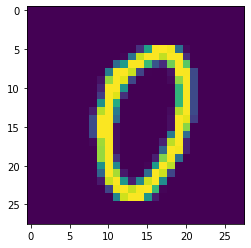

In [19]:
plt.imshow(x_train[1000])

In [20]:
# Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

In [69]:
# model = Sequential([
#     # used to convert ND to 1D, so it will make 784 neurons in input layer
#     Flatten(input_shape=(28,28)), # input layer : 784 neurons
#     Dense(512, activation="tanh"), # Hidden Layer : 512 neurons
#     Dense(256, activation="tanh"), # Hidden Layer : 256 neurons
#     Dense(10, activation="softmax") # Output Layer : 10 neurons
# ])

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation="relu"))
model.add(Dense(15, activation="tanh"))
model.add(Dense(10, activation="softmax"))

In [70]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 10)                7850      
                                                                 
 dense_26 (Dense)            (None, 15)                165       
                                                                 
 dense_27 (Dense)            (None, 10)                160       
                                                                 
Total params: 8,175
Trainable params: 8,175
Non-trainable params: 0
_________________________________________________________________


In [73]:
# model.compile(optimizer="adam",
#              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=[tf.keras.metrics.AUC(from_logits=True)])

model.compile(optimizer="rmsprop",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [74]:
model.fit(x_train,y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 2s 880us/step - loss: 0.3089 - accuracy: 0.9107 - val_loss: 0.2674 - val_accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 1s 772us/step - loss: 0.2616 - accuracy: 0.9229 - val_loss: 0.2499 - val_accuracy: 0.9293
Epoch 3/5
1875/1875 [==============================] - 1s 769us/step - loss: 0.2402 - accuracy: 0.9289 - val_loss: 0.2567 - val_accuracy: 0.9245
Epoch 4/5
1875/1875 [==============================] - 1s 784us/step - loss: 0.2267 - accuracy: 0.9336 - val_loss: 0.2338 - val_accuracy: 0.9317
Epoch 5/5
1875/1875 [==============================] - 1s 779us/step - loss: 0.2186 - accuracy: 0.9352 - val_loss: 0.2304 - val_accuracy: 0.9330


In [27]:
# model.history.history

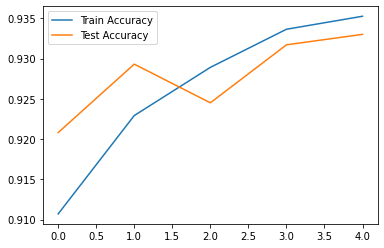

In [75]:
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

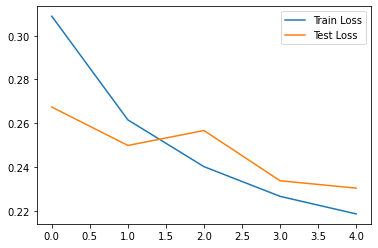

In [76]:
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()